In [1]:
import sys
import os
import csv
import config

import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
%matplotlib inline

PROJECT_PATH = config.data_directory

# load dataFrame
df = pd.read_csv('{}/{}.csv'.format(PROJECT_PATH, 'engSongs'))
df.head()

,id,name,popularity,duration_ms,explicit,artist,artist_id,album,album_id,album_release_date,...,lyrics,is_english,t_entities,subjectivity,polarity,positivity,neutrality,negativity,safinn_score,afinn_score
0,57bgtoPSgt236HzfBOd8kj,Thunderstruck,82,292880,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Thunder [x10] I was caught In the middle of ...,True,"{(384, 'Beating'): 'GPE', (380, 'Thunderstruck...",0.399074,0.275926,0.232,0.664,0.104,22,10.0
1,5u5F7qLDvZjBSktaDp4HxB,Moneytalks,64,225946,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,"Tailored suits, chauffeured cars Fine hotels...",True,"{(390, 'the Moneytalk Come'): 'LAW', (381, 'Fr...",0.330324,0.042593,0.025,0.961,0.014,5,4.0
2,7A1odihHBrI8n9k0Fefh2j,Are You Ready,65,250333,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Sweet apple pie Standing in the street Hands...,True,{},0.558980,0.402925,0.349,0.643,0.009,56,2.0
3,0cLvKgKkqlaJ9UajbitH4l,Fire Your Guns,60,173746,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Wild beast I'll make you mine Taste your kis...,True,"{(380, 'Sweet'): 'PERSON'}",0.332843,-0.000490,0.122,0.549,0.329,-40,3.0
4,4ObCns6nM6tShx5a5tHiGC,The Razors Edge,50,262533,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,There's fightin' on the left And marching on...,True,"{(380, 'Razor'): 'PERSON'}",0.437188,-0.069161,0.035,0.803,0.162,-16,-11.0


In [3]:
df.set_index('id')

,name,popularity,duration_ms,explicit,artist,artist_id,album,album_id,album_release_date,album_total_tracks,...,lyrics,is_english,t_entities,subjectivity,polarity,positivity,neutrality,negativity,safinn_score,afinn_score
id,,,,,,,,,,,,,,,,,,,,,
57bgtoPSgt236HzfBOd8kj,Thunderstruck,82,292880,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,12,...,Thunder [x10] I was caught In the middle of ...,True,"{(384, 'Beating'): 'GPE', (380, 'Thunderstruck...",0.399074,0.275926,0.232,0.664,0.104,22,10.0
5u5F7qLDvZjBSktaDp4HxB,Moneytalks,64,225946,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,12,...,"Tailored suits, chauffeured cars Fine hotels...",True,"{(390, 'the Moneytalk Come'): 'LAW', (381, 'Fr...",0.330324,0.042593,0.025,0.961,0.014,5,4.0
7A1odihHBrI8n9k0Fefh2j,Are You Ready,65,250333,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,12,...,Sweet apple pie Standing in the street Hands...,True,{},0.558980,0.402925,0.349,0.643,0.009,56,2.0
0cLvKgKkqlaJ9UajbitH4l,Fire Your Guns,60,173746,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,12,...,Wild beast I'll make you mine Taste your kis...,True,"{(380, 'Sweet'): 'PERSON'}",0.332843,-0.000490,0.122,0.549,0.329,-40,3.0
4ObCns6nM6tShx5a5tHiGC,The Razors Edge,50,262533,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,12,...,There's fightin' on the left And marching on...,True,"{(380, 'Razor'): 'PERSON'}",0.437188,-0.069161,0.035,0.803,0.162,-16,-11.0
5pKJtX4wBeby9qIfFhyOJj,Don't Go Breaking My Heart,71,271133,0,Elton John,3PhoLpVuITZKcymswpck5b,To Be Continued...,7iKDBfOFUtg8E8RbuDhiux,1990-11-08,67,...,Don't go breaking my heart I couldn't if I t...,True,"{(383, 'Baby'): 'ORG'}",0.563757,0.154497,0.009,0.971,0.019,16,-2.0
1fF2dvBsbTk2wrOEaR6f5B,Sad Songs (Say So Much),50,249226,0,Elton John,3PhoLpVuITZKcymswpck5b,To Be Continued...,7iKDBfOFUtg8E8RbuDhiux,1990-11-08,67,...,Guess there are times when we all need to sh...,True,"{(383, 'Cause'): 'ORG', (381, 'Sad'): 'NORP', ...",0.635255,-0.148131,0.110,0.703,0.187,-13,-6.0
4wlB8D6OZpHEz3kXVuYD2O,Honky Cat,48,313133,0,Elton John,3PhoLpVuITZKcymswpck5b,To Be Continued...,7iKDBfOFUtg8E8RbuDhiux,1990-11-08,67,...,When I look back boy I must have been green ...,True,"{(381, 'Better'): 'NORP', (384, 'New Orleans')...",0.310722,0.102915,0.076,0.872,0.051,8,4.0
4i6wwcBc3Qrqir83xBdbM6,Saturday Night's Alright (For Fighting),41,294800,0,Elton John,3PhoLpVuITZKcymswpck5b,To Be Continued...,7iKDBfOFUtg8E8RbuDhiux,1990-11-08,67,...,It's getting late have you seen my mates Ma ...,True,"{(380, 'Ma'): 'PERSON', (392, ""seven o'clock"")...",0.423571,0.086138,0.188,0.780,0.032,13,10.0


In [4]:
df.describe()

,popularity,duration_ms,explicit,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,subjectivity,polarity,positivity,neutrality,negativity,safinn_score,afinn_score
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,51.000000,253756.200000,0.082353,13.133333,0.546169,0.666566,5.286275,-9.654722,0.745098,0.070105,...,0.187750,0.515790,124.584259,0.508242,0.099240,0.137333,0.764149,0.098537,5.372549,-0.454902
std,8.534322,60998.006529,0.275442,7.632160,0.166780,0.215236,3.232525,3.584475,0.436663,0.076383,...,0.138604,0.247535,29.355127,0.123374,0.197739,0.081074,0.099091,0.079028,29.678833,11.505430
min,37.000000,115720.000000,0.000000,5.000000,0.150000,0.053400,0.000000,-29.643000,0.000000,0.022400,...,0.022600,0.034500,66.667000,0.158333,-0.500000,0.000000,0.430000,0.000000,-179.000000,-78.000000
25%,45.000000,212679.500000,0.000000,10.000000,0.407000,0.504000,2.000000,-11.783000,0.000000,0.030550,...,0.092200,0.321000,103.566500,0.431871,-0.021533,0.079000,0.703000,0.038500,-9.500000,-5.000000
50%,49.000000,246533.000000,0.000000,12.000000,0.563000,0.700000,6.000000,-9.573000,1.000000,0.041000,...,0.129000,0.510000,121.207000,0.518687,0.090000,0.122000,0.774000,0.080000,4.000000,2.000000
75%,56.000000,286633.000000,0.000000,14.000000,0.675000,0.841000,8.000000,-7.149000,1.000000,0.068200,...,0.250500,0.702000,140.870000,0.584294,0.211280,0.171500,0.831500,0.140000,19.000000,6.000000
max,82.000000,533306.000000,1.000000,67.000000,0.980000,0.997000,11.000000,-2.410000,1.000000,0.498000,...,0.820000,0.975000,217.591000,0.900000,1.000000,0.433000,0.977000,0.382000,100.000000,24.000000


In [5]:
df_num = df.select_dtypes(include = ['float64', 'int64']).copy()
df_num.head()

,popularity,duration_ms,explicit,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,subjectivity,polarity,positivity,neutrality,negativity,safinn_score,afinn_score
0,82,292880,0,12,0.501,0.889,4,-5.175,1,0.0364,...,0.2170,0.257,133.519,0.399074,0.275926,0.232,0.664,0.104,22,10.0
1,64,225946,0,12,0.650,0.903,7,-3.677,1,0.0314,...,0.1220,0.409,121.896,0.330324,0.042593,0.025,0.961,0.014,5,4.0
2,65,250333,0,12,0.454,0.821,7,-4.816,1,0.0324,...,0.1300,0.414,108.533,0.558980,0.402925,0.349,0.643,0.009,56,2.0
3,60,173746,0,12,0.551,0.960,9,-3.284,1,0.0508,...,0.0941,0.515,98.879,0.332843,-0.000490,0.122,0.549,0.329,-40,3.0
4,50,262533,0,12,0.408,0.947,4,-3.522,1,0.0532,...,0.1680,0.306,101.058,0.437188,-0.069161,0.035,0.803,0.162,-16,-11.0


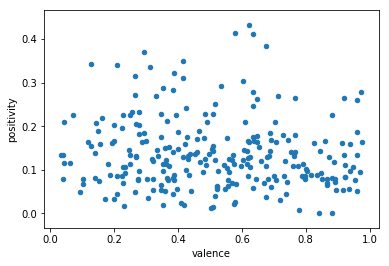

In [21]:
df.plot.scatter(x='valence', y='positivity')

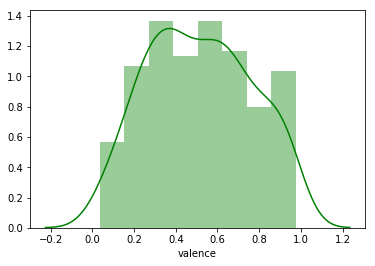

In [16]:
sns.distplot(df_num['valence'], color='g');

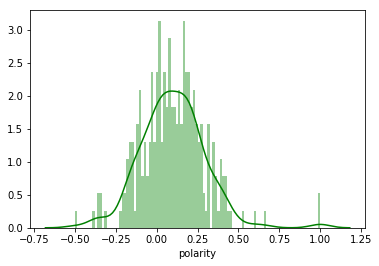

In [22]:
sns.distplot(df_num['polarity'], color='g', bins=100, hist_kws={'alpha': 0.4});

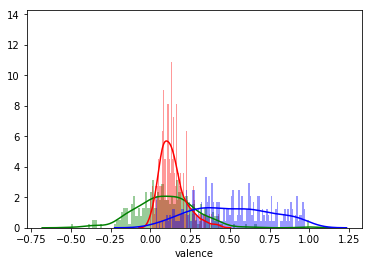

In [23]:
sns.distplot(df_num['polarity'], color='g', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(df_num['positivity'], color='r', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(df_num['valence'], color='b', bins=100, hist_kws={'alpha': 0.4});